In [1]:
%matplotlib inline

import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

from qiime.parse import parse_mapping_file
from qiime.format import format_mapping_file
from skbio.io.util import open_file
from scipy.stats import pearsonr, spearmanr

def load_mf(fn):
    with open_file(fn, 'U') as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file

def write_mf(f, _df):
    with open_file(f, 'w') as fp:
        lines = format_mapping_file(['SampleID'] + _df.columns.tolist(),
                                    list(_df.itertuples()))
        fp.write(lines+'\n')

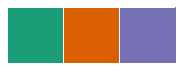

In [3]:
ibd_colors = sns.color_palette(["#1b9e77", "#d95f02", "#7570b3"])
sns.palplot(ibd_colors)

sns.set_palette(ibd_colors)

Coerce the data and make it consciously more usable

In [2]:
mf = load_mf('mapping-file-full.alpha.L6index.txt')

EXTRA_CATS = ['Gevers_Dysbiosis_Index', 'indiv_g_protein_1000kcal_ME_group',
              'indiv_g_fat_1000kcal_ME_group', 'age', 'Weight_kg']

# making the alpha diversity data usable
metrics = ['PD_whole_tree_even_15000_alpha', 'observed_species_even_15000_alpha',
          'shannon_even_15000_alpha', 'chao1_even_15000_alpha']
for metric in metrics + EXTRA_CATS:
    mf[metric] = mf[metric].convert_objects(convert_numeric=True)
    
mf.dropna(subset=metrics + EXTRA_CATS, inplace=True)

/Users/yoshikivazquezbaeza/.virtualenvs/qiime-191/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Comparison of Gevers et al Dysbiosis index against $\alpha$-diversity

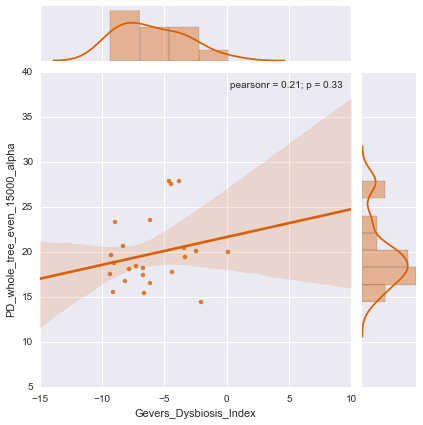

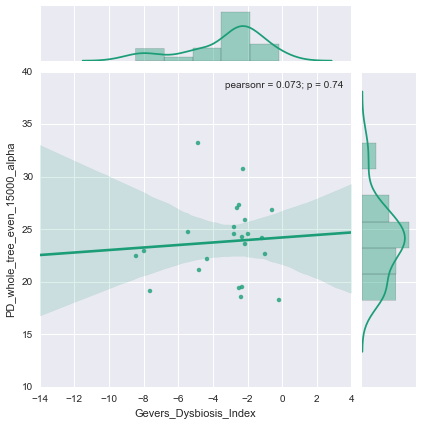

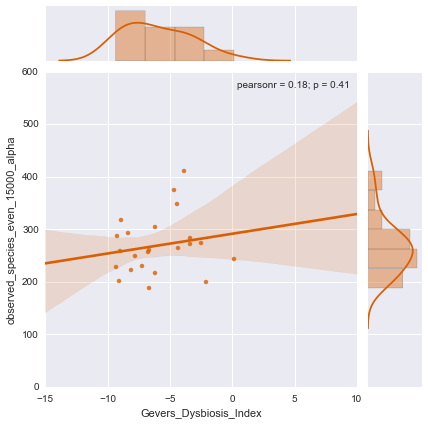

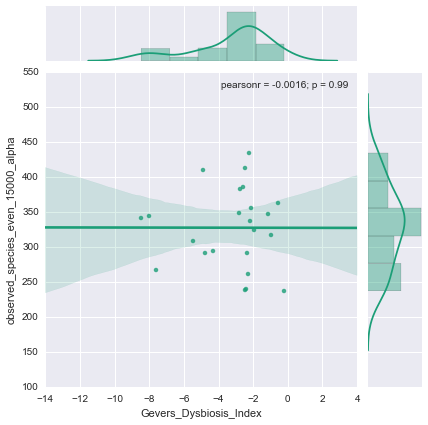

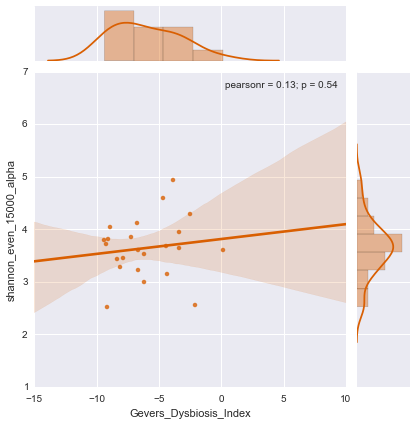

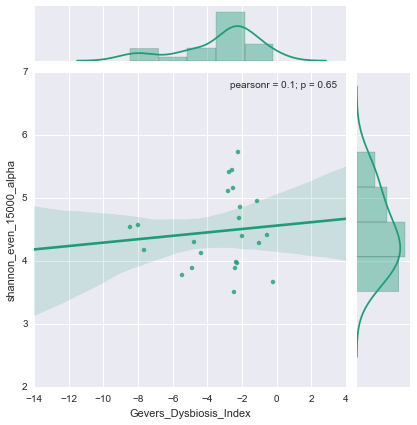

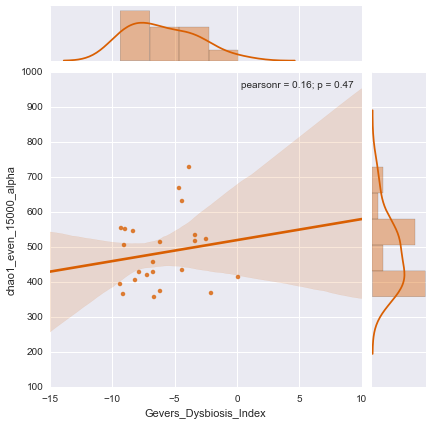

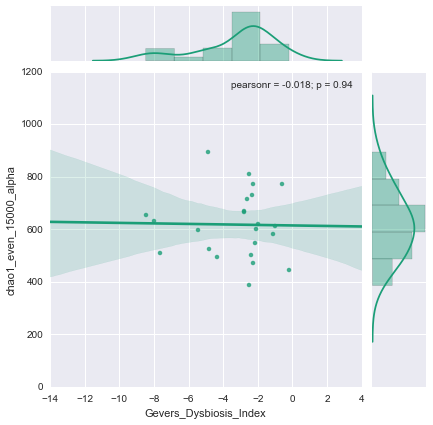

In [8]:
!mkdir -p md-index/no-diarrhea/

for m in metrics:
    plt.figure()
    sns.jointplot(x='Gevers_Dysbiosis_Index', y=m, data=mf[mf.disease_stat == 'IBD'],
                  color='#d95f02', kind='reg')
    plt.savefig('md-index/gevers-ibd-%s.pdf' % m, dpi=326)
    
    plt.figure()
    sns.jointplot(x='Gevers_Dysbiosis_Index', y=m, data=mf[mf.disease_stat == 'healthy'],
                  color='#1b9e77', kind='reg')
    plt.savefig('md-index/gevers-healthy-%s.pdf' % m, dpi=326)
    
    #a = mf[mf.disease_stat == 'IBD']
    #r, p = pearsonr(a[m], a['Gevers_Dysbiosis_Index'])
    #print 'IBD: %s vs dysbiosis index r:%f p:%f' % (m, r, p)
    
    #a = mf[mf.disease_stat != 'IBD']
    #r, p = pearsonr(a[m], a['Gevers_Dysbiosis_Index'])
    #print 'Healthy: %s vs dysbiosis index r:%f p:%f' % (m, r, p)

# Looking at protein content and $\alpha$-diversity

IBD: PD_whole_tree_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.242970 p:0.263950
Healthy: PD_whole_tree_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:0.025569 p:0.907807
IBD: observed_species_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.208495 p:0.339733
Healthy: observed_species_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.059013 p:0.789112
IBD: shannon_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.333944 p:0.119394
Healthy: shannon_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.094664 p:0.667455
IBD: chao1_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.173867 p:0.427541
Healthy: chao1_even_15000_alpha vs indiv_g_protein_1000kcal_ME_group r:-0.027942 p:0.899293


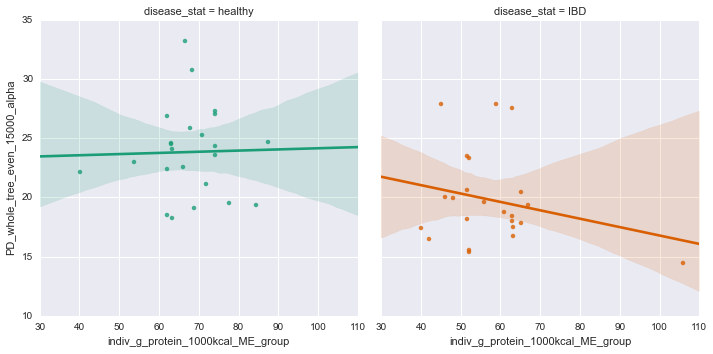

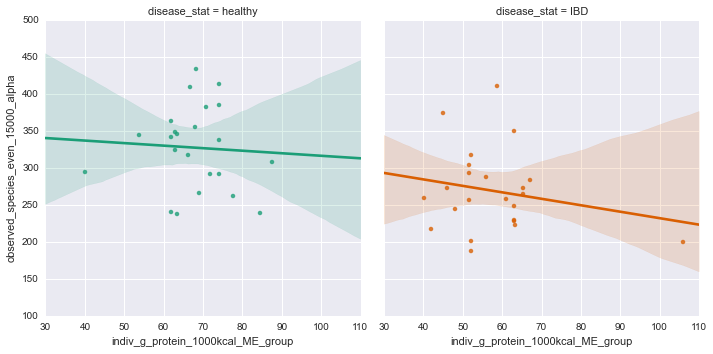

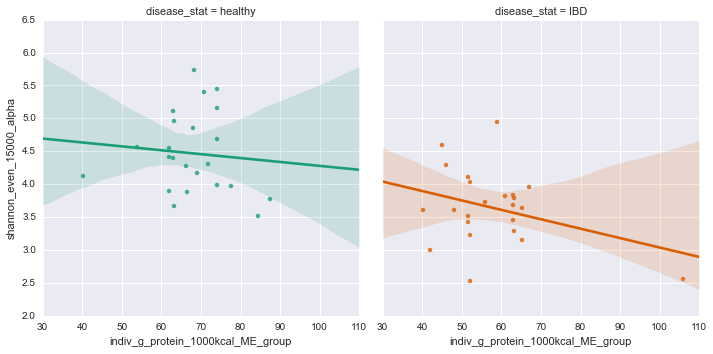

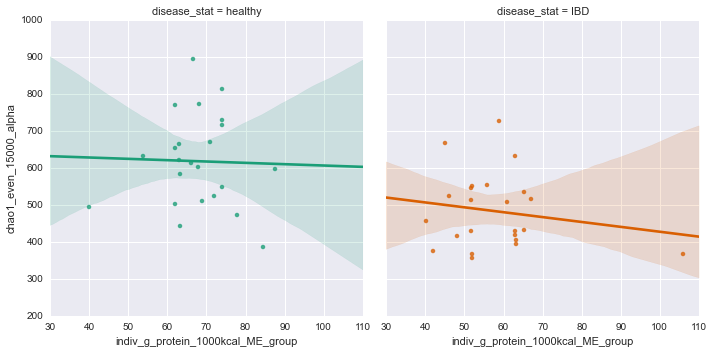

In [10]:
!mkdir -p md-index/no-diarrhea/

for m in metrics:
    sns.lmplot(x='indiv_g_protein_1000kcal_ME_group', y=m, data=mf,
               hue='disease_stat', col='disease_stat', robust=0)
    plt.savefig('md-index/protein-%s.pdf' % m, dpi=326)
    
    a = mf[mf.disease_stat == 'IBD']
    r, p = pearsonr(a[m], a['indiv_g_protein_1000kcal_ME_group'])
    print 'IBD: %s vs indiv_g_protein_1000kcal_ME_group r:%f p:%f' % (m, r, p)

    
    a = mf[mf.disease_stat != 'IBD']
    r, p = pearsonr(a[m], a['indiv_g_protein_1000kcal_ME_group'])
    print 'Healthy: %s vs indiv_g_protein_1000kcal_ME_group r:%f p:%f' % (m, r, p)

# Looking at fat content

IBD: PD_whole_tree_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.090690 p:0.680686
Healthy: PD_whole_tree_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:0.012533 p:0.954740
IBD: observed_species_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.147653 p:0.501375
Healthy: observed_species_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.085763 p:0.697213
IBD: shannon_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.081825 p:0.710521
Healthy: shannon_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.168306 p:0.442692
IBD: chao1_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.098294 p:0.655457
Healthy: chao1_even_15000_alpha vs indiv_g_fat_1000kcal_ME_group r:-0.141935 p:0.518266


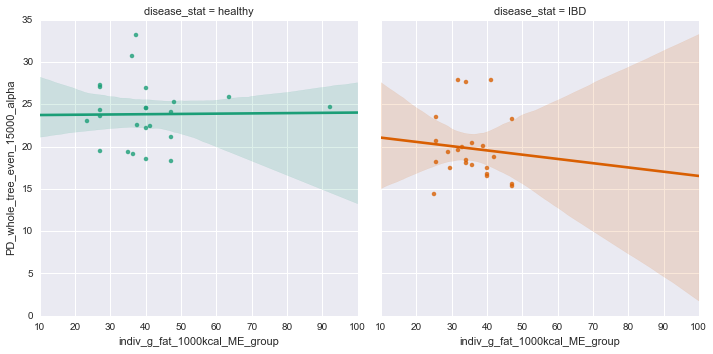

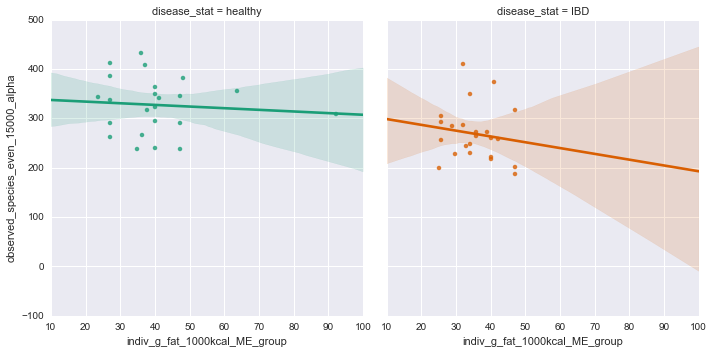

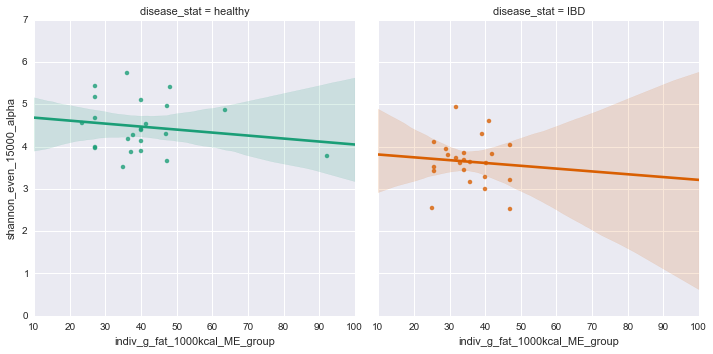

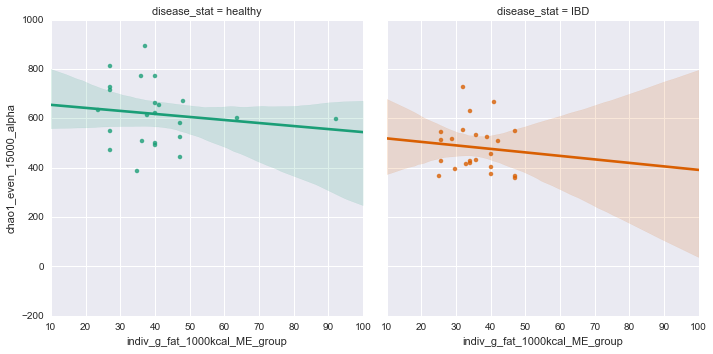

In [15]:
!mkdir -p md-index/no-diarrhea/

for m in metrics:
    sns.lmplot(x='indiv_g_fat_1000kcal_ME_group', y=m, data=mf,
               hue='disease_stat', col='disease_stat')
    plt.savefig('md-index/fat-%s.pdf' % m, dpi=326)
    
    a = mf[mf.disease_stat == 'IBD']
    r, p = pearsonr(a[m], a['indiv_g_fat_1000kcal_ME_group'])
    print 'IBD: %s vs indiv_g_fat_1000kcal_ME_group r:%f p:%f' % (m, r, p)

    a = mf[mf.disease_stat != 'IBD']
    r, p = pearsonr(a[m], a['indiv_g_fat_1000kcal_ME_group'])
    print 'Healthy: %s vs indiv_g_fat_1000kcal_ME_group r:%f p:%f' % (m, r, p)

# Now looking at Age

IBD: PD_whole_tree_even_15000_alpha vs age r:0.280981 p:0.194032
Healthy: PD_whole_tree_even_15000_alpha vs age r:0.012533 p:0.954740
IBD: observed_species_even_15000_alpha vs age r:0.392787 p:0.063738
Healthy: observed_species_even_15000_alpha vs age r:-0.085763 p:0.697213
IBD: shannon_even_15000_alpha vs age r:0.400984 p:0.057925
Healthy: shannon_even_15000_alpha vs age r:-0.168306 p:0.442692
IBD: chao1_even_15000_alpha vs age r:0.449183 p:0.031542
Healthy: chao1_even_15000_alpha vs age r:-0.141935 p:0.518266


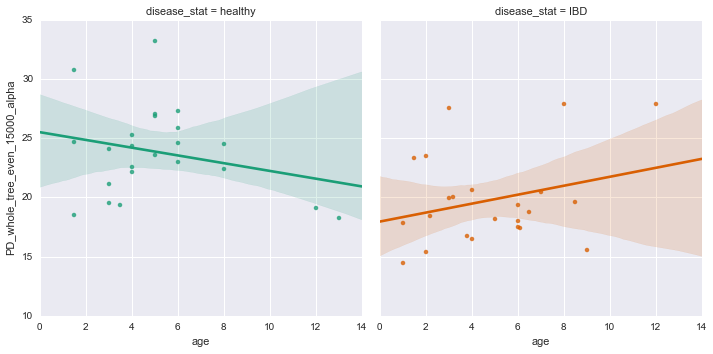

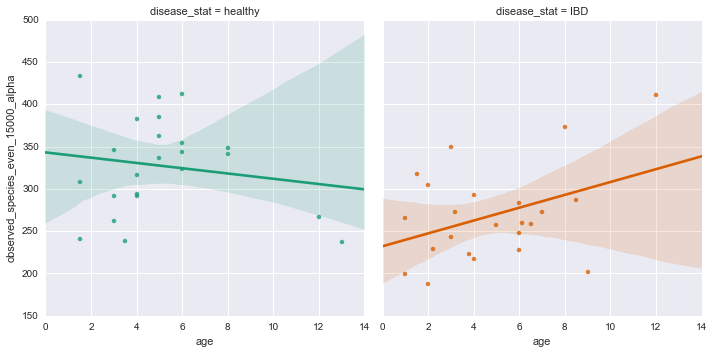

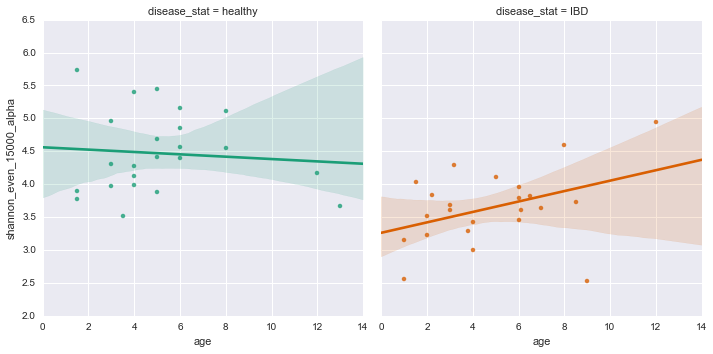

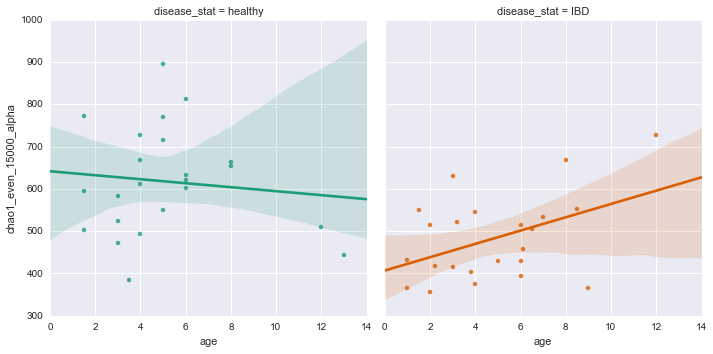

In [11]:
!mkdir -p md-index/no-diarrhea/

CAT = 'age'

for m in metrics:
    sns.lmplot(x=CAT, y=m, data=mf,
               hue='disease_stat', col='disease_stat')
    plt.savefig('md-index/%s-%s.pdf' % (CAT, m), dpi=326)
    
    a = mf[mf.disease_stat == 'IBD']
    r, p = pearsonr(a[m], a[CAT])
    print 'IBD: %s vs %s r:%f p:%f' % (m, CAT, r, p)

    a = mf[mf.disease_stat != 'IBD']
    r, p = pearsonr(a[m], a['indiv_g_fat_1000kcal_ME_group'])
    print 'Healthy: %s vs %s r:%f p:%f' % (m, CAT, r, p)

# Now looking at Weight (Kg)

IBD: PD_whole_tree_even_15000_alpha vs Weight_kg r:0.153050 p:0.485681
Healthy: PD_whole_tree_even_15000_alpha vs Weight_kg r:-0.197549 p:0.366246
IBD: observed_species_even_15000_alpha vs Weight_kg r:0.103948 p:0.636929
Healthy: observed_species_even_15000_alpha vs Weight_kg r:-0.204235 p:0.349913
IBD: shannon_even_15000_alpha vs Weight_kg r:0.177952 p:0.416592
Healthy: shannon_even_15000_alpha vs Weight_kg r:-0.113618 p:0.605727
IBD: chao1_even_15000_alpha vs Weight_kg r:0.011309 p:0.959156
Healthy: chao1_even_15000_alpha vs Weight_kg r:-0.115689 p:0.599128


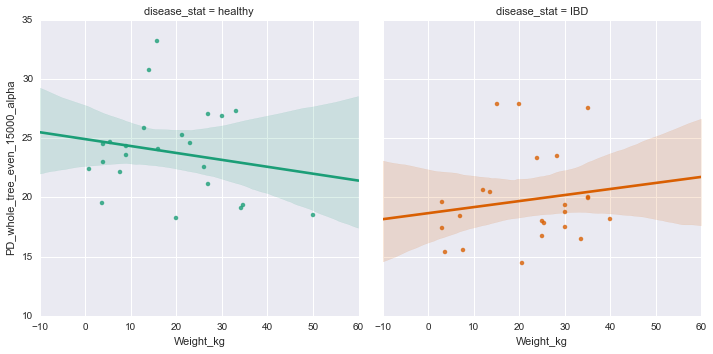

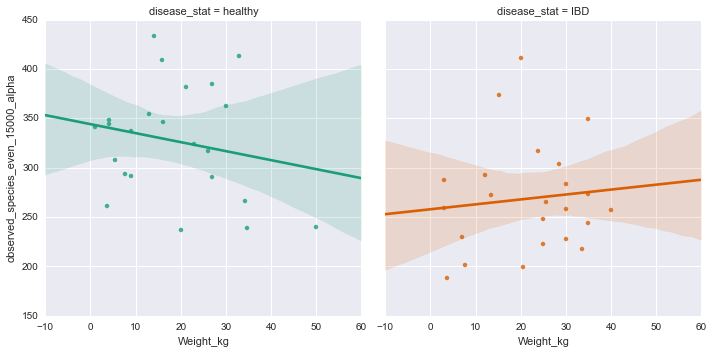

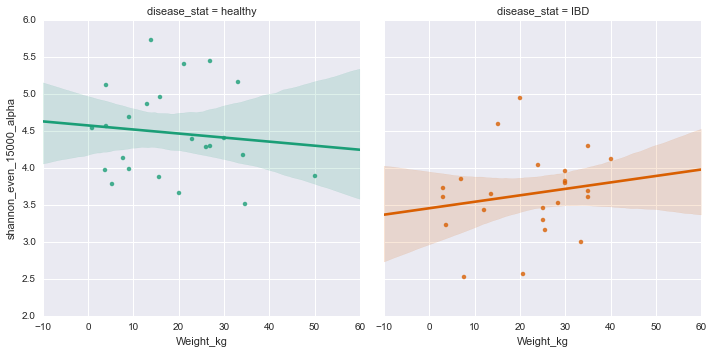

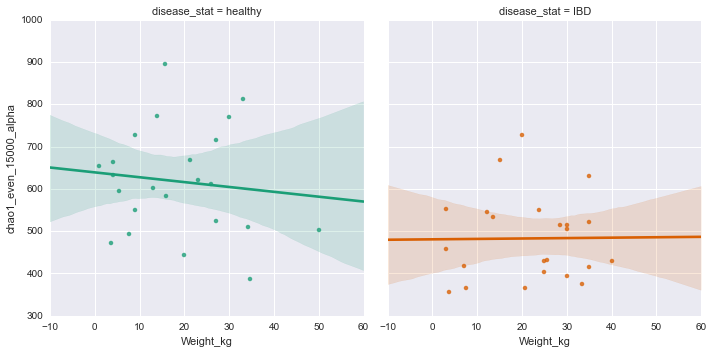

In [14]:
!mkdir -p md-index/no-diarrhea/

CAT = 'Weight_kg'

for m in metrics:
    sns.lmplot(x=CAT, y=m, data=mf,
               hue='disease_stat', col='disease_stat')
    plt.savefig('md-index/weight-%s.pdf' % m, dpi=326)
    
    a = mf[mf.disease_stat == 'IBD']
    r, p = pearsonr(a[m], a[CAT])
    print 'IBD: %s vs %s r:%f p:%f' % (m, CAT, r, p)

    a = mf[mf.disease_stat != 'IBD']
    r, p = pearsonr(a[m], a[CAT])
    print 'Healthy: %s vs %s r:%f p:%f' % (m, CAT, r, p)

# Alpha diversity comparison

In [5]:
mf.disease_stat.value_counts()

IBD        23
healthy    23
Name: disease_stat, dtype: int64

In [6]:
mf = load_mf('mapping-file-full.alpha.txt')

# making the alpha diversity data usable
metrics = ['PD_whole_tree_even_15000_alpha', 'observed_species_even_15000_alpha',
          'shannon_even_15000_alpha', 'chao1_even_15000_alpha']

mf['PD_whole_tree_even_15000_alpha'] = pd.to_numeric(mf['PD_whole_tree_even_15000_alpha'], errors='coerce')

In [7]:
mf.disease_stat.value_counts()

healthy                98
IBD                    79
acute hem. diarrhea    15
Name: disease_stat, dtype: int64

In [14]:
from scipy.stats import mannwhitneyu

a = mf[mf.disease_stat == 'healthy'].PD_whole_tree_even_15000_alpha
b = mf[mf.disease_stat == 'IBD'].PD_whole_tree_even_15000_alpha

s, p = mannwhitneyu(a.values, b.values)

print 'Healthy Mean: %0.3f; IBD Mean: %0.3f' % (a.mean(), b.mean())

print 'p value of healthy vs IBD: %0.3f' % p

Healthy Mean: 23.203; IBD Mean: 19.093
p value of healthy vs IBD: 0.003
